In [1]:
import coremltools as ct
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_image(path, resize_to=None):
    # resize_to: (Width, Height)
    img = PIL.Image.open(path)
    if resize_to is not None:
        img = img.resize(resize_to, PIL.Image.ANTIALIAS)
    img_np = np.array(img).astype(np.float32)
    return img_np, img

In [19]:
# Load the model
model = ct.models.MLModel('test.mlmodel')
print(model)

input {
  name: "image"
  type {
    multiArrayType {
      shape: 1
      shape: 3
      shape: 512
      shape: 512
      dataType: FLOAT32
    }
  }
}
output {
  name: "class_prediction"
  type {
    multiArrayType {
      dataType: INT32
    }
  }
}
metadata {
  shortDescription: "Segementation model to seperate sky and foreground."
  versionString: "1.0"
  author: "Leon Jungemeyer"
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "torch==1.10.2"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}



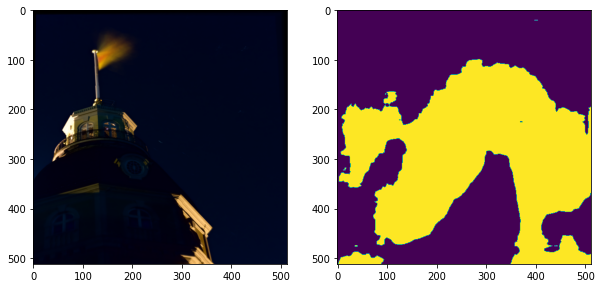

In [30]:
# Load the image and resize using PIL utilities.
_, img = load_image('/Users/leonjungemeyer/Downloads/IMG_2909.PNG', resize_to=(512, 512))

img_np = np.array(img.convert('RGB')).reshape(1, 3, 512, 512).astype(np.float32)

out_name = "class_prediction"
out_dict = model.predict({'image': img_np})

f, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].imshow(img.convert('RGB'), vmin=0, vmax=4)
axs[1].imshow(out_dict['class_prediction'][0,0])
plt.show()